In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [110]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [112]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

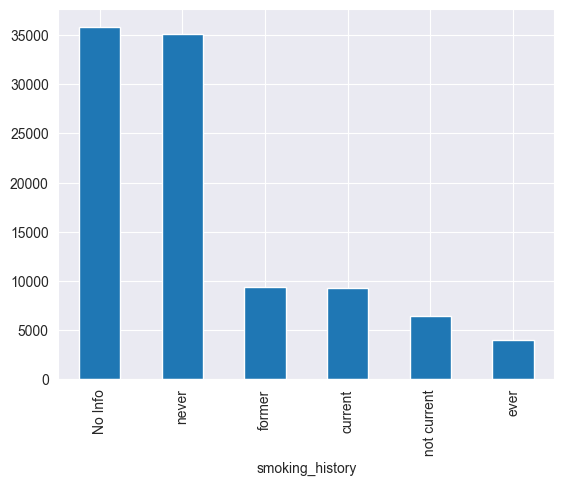

In [113]:
df.smoking_history.value_counts().plot(kind='bar')
plt.show()

In [114]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
ohe=encoder.fit_transform(df[['smoking_history']]).toarray()
labels=encoder.categories_
feat_labels=np.concatenate(labels)
ohc_df=pd.DataFrame(data=ohe, columns=feat_labels)
df=pd.concat([df, ohc_df], axis=1)
df=df.drop('smoking_history', axis=1)
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,No Info,current,ever,former,never,not current
0,Female,80.0,0,1,25.19,6.6,140,0,0.0,0.0,0.0,0.0,1.0,0.0
1,Female,54.0,0,0,27.32,6.6,80,0,1.0,0.0,0.0,0.0,0.0,0.0
2,Male,28.0,0,0,27.32,5.7,158,0,0.0,0.0,0.0,0.0,1.0,0.0
3,Female,36.0,0,0,23.45,5.0,155,0,0.0,1.0,0.0,0.0,0.0,0.0
4,Male,76.0,1,1,20.14,4.8,155,0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,27.32,6.2,90,0,1.0,0.0,0.0,0.0,0.0,0.0
99996,Female,2.0,0,0,17.37,6.5,100,0,1.0,0.0,0.0,0.0,0.0,0.0
99997,Male,66.0,0,0,27.83,5.7,155,0,0.0,0.0,0.0,1.0,0.0,0.0
99998,Female,24.0,0,0,35.42,4.0,100,0,0.0,0.0,0.0,0.0,1.0,0.0


In [115]:
df.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [116]:
df = df.drop(df[df['gender'] == 'Other'].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  object 
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   bmi                  99982 non-null  float64
 5   HbA1c_level          99982 non-null  float64
 6   blood_glucose_level  99982 non-null  int64  
 7   diabetes             99982 non-null  int64  
 8   No Info              99982 non-null  float64
 9   current              99982 non-null  float64
 10  ever                 99982 non-null  float64
 11  former               99982 non-null  float64
 12  never                99982 non-null  float64
 13  not current          99982 non-null  float64
dtypes: float64(9), int64(4), object(1)
memory usage: 11.4+ MB


In [117]:
df.gender=df.gender.apply(lambda x: 1 if x == 'Female' else 0)
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,No Info,current,ever,former,never,not current
0,1,80.0,0,1,25.19,6.6,140,0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,54.0,0,0,27.32,6.6,80,0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,28.0,0,0,27.32,5.7,158,0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,36.0,0,0,23.45,5.0,155,0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,76.0,1,1,20.14,4.8,155,0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,80.0,0,0,27.32,6.2,90,0,1.0,0.0,0.0,0.0,0.0,0.0
99996,1,2.0,0,0,17.37,6.5,100,0,1.0,0.0,0.0,0.0,0.0,0.0
99997,0,66.0,0,0,27.83,5.7,155,0,0.0,0.0,0.0,1.0,0.0,0.0
99998,1,24.0,0,0,35.42,4.0,100,0,0.0,0.0,0.0,0.0,1.0,0.0


In [118]:
df["not_current"] = df['not current']

In [119]:
df = df.drop(['No Info','not current'], axis=1)

In [120]:
df_corr = df.corr()
df_corr

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,current,ever,former,never,not_current
gender,1.000000,0.030369,-0.014381,-0.077886,0.023023,-0.020044,-0.017196,-0.037623,-0.026589,-0.011005,-0.049002,0.098618,0.011758
age,0.030369,1.000000,0.251163,0.233352,0.337378,0.101343,0.110679,0.257999,0.030917,0.065792,0.216468,0.065423,0.067946
hypertension,-0.014381,0.251163,1.000000,0.121253,0.147679,0.080941,0.084436,0.197811,0.017914,0.023131,0.083386,0.045937,0.001077
heart_disease,-0.077886,0.233352,0.121253,1.000000,0.061203,0.067591,0.070071,0.171718,0.007592,0.040679,0.095184,-0.030859,0.007983
bmi,0.023023,0.337378,0.147679,0.061203,1.000000,0.083017,0.091310,0.214377,0.053623,0.044353,0.111322,0.086803,0.035093
HbA1c_level,-0.020044,0.101343,0.080941,0.067591,0.083017,1.000000,0.166831,0.400696,0.006117,0.009702,0.037303,0.010719,0.009676
blood_glucose_level,-0.017196,0.110679,0.084436,0.070071,0.091310,0.166831,1.000000,0.419587,0.012450,0.006284,0.040692,0.012463,0.008725
diabetes,-0.037623,0.257999,0.197811,0.171718,0.214377,0.400696,0.419587,1.000000,0.019588,0.024088,0.097901,0.027248,0.020831
current,-0.026589,0.030917,0.017914,0.007592,0.053623,0.006117,0.012450,0.019588,1.000000,-0.065347,-0.102787,-0.235307,-0.083951
ever,-0.011005,0.065792,0.023131,0.040679,0.044353,0.009702,0.006284,0.024088,-0.065347,1.000000,-0.065603,-0.150183,-0.053581


<Axes: >

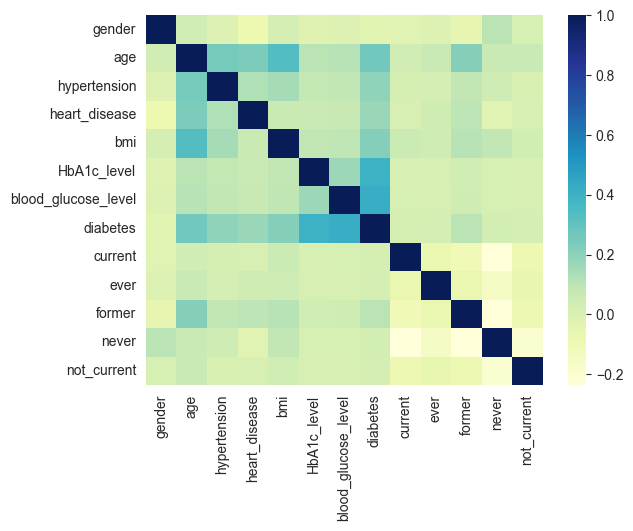

In [121]:
sns.heatmap(df_corr, cmap = 'YlGnBu')

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
np_norm=scaler.fit_transform(df)
df_norm=pd.DataFrame(data=np_norm, columns=df.columns)
df_norm

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,current,ever,former,never,not_current
0,1.0,1.000000,0.0,1.0,0.177171,0.563636,0.272727,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.674675,0.0,0.0,0.202031,0.563636,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.349349,0.0,0.0,0.202031,0.400000,0.354545,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.449449,0.0,0.0,0.156863,0.272727,0.340909,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.949950,1.0,1.0,0.118231,0.236364,0.340909,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99977,1.0,1.000000,0.0,0.0,0.202031,0.490909,0.045455,0.0,0.0,0.0,0.0,0.0,0.0
99978,1.0,0.024024,0.0,0.0,0.085901,0.545455,0.090909,0.0,0.0,0.0,0.0,0.0,0.0
99979,0.0,0.824825,0.0,0.0,0.207983,0.400000,0.340909,0.0,0.0,0.0,1.0,0.0,0.0
99980,1.0,0.299299,0.0,0.0,0.296569,0.090909,0.090909,0.0,0.0,0.0,0.0,1.0,0.0


In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_norm.drop('diabetes', axis=1), df_norm.diabetes, test_size=0.2, random_state=13)

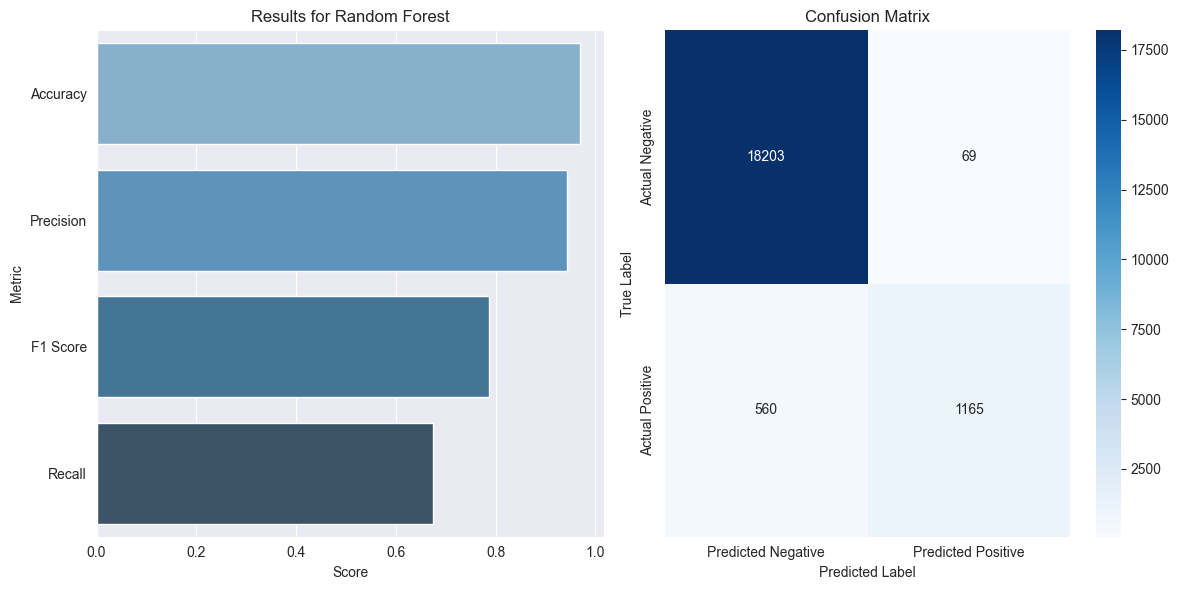

In [124]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, predictions)
rf_precision = precision_score(y_test, predictions)
rf_f1 = f1_score(y_test, predictions)
rf_recall = recall_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.subplot(1, 2, 1)
scores = [rf_accuracy, rf_precision, rf_f1, rf_recall]
labels = ['Accuracy', 'Precision', 'F1 Score', 'Recall']
sns.barplot(x=scores, y=labels, palette='Blues_d')
plt.xlabel('Score')
plt.ylabel('Metric')
plt.title('Results for Random Forest')

plt.tight_layout()
plt.show()

In [125]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(rf_classifier, pickle_out)
pickle_out.close()